In [270]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [271]:
import matplotlib.pyplot as plt

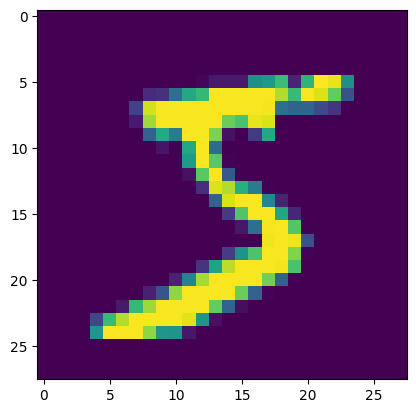

In [272]:
plt.imshow(training_images[0])

In [273]:
training_images.shape

(60000, 28, 28)

In [274]:
test_images.shape

(10000, 28, 28)

In [275]:
training_images[0].shape

(28, 28)

In [276]:
training_images=training_images.astype("float")/255.0
test_images=test_images.astype("float")/255.0



In [277]:
from sklearn.model_selection import train_test_split as split
x_val,x_test,y_val,y_test=split(test_images,test_labels,test_size=0.5,random_state=16)

In [278]:
# from sklearn.preprocessing import LabelBinarizer
# lb=LabelBinarizer()
# training_labels=lb.fit_transform(training_labels)
# test_labels=lb.fit_transform(test_labels)

In [279]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import losses

In [280]:
model=Sequential()

In [281]:
h=28
w=28
classes=10
shape=[w,h]

In [282]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=[28,28,1]))
model.add(Activation("relu"))
model.add(BatchNormalization())

e:\machine_learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [283]:
model.add(MaxPool2D(pool_size=(2,2)))

In [284]:
model.add(Flatten())

In [285]:
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [286]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [287]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805,194 (3.07 MB)

 Trainable params: 804,874 (3.07 MB)

 Non-trainable params: 320 (1.25 KB)

In [288]:
opt=SGD(learning_rate=0.01,momentum=0.9)

In [289]:
model.compile(optimizer=opt,loss=losses.SparseCategoricalCrossentropy(),metrics=['acc'])

In [290]:
model.fit(training_images,
    training_labels,
    batch_size=64,
    epochs=10,
    validation_data=(x_val, y_val),
    )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - acc: 0.9295 - loss: 0.2366 - val_acc: 0.9790 - val_loss: 0.0618
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - acc: 0.9867 - loss: 0.0466 - val_acc: 0.9854 - val_loss: 0.0475
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - acc: 0.9926 - loss: 0.0265 - val_acc: 0.9856 - val_loss: 0.0445
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - acc: 0.9946 - loss: 0.0198 - val_acc: 0.9878 - val_loss: 0.0375
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - acc: 0.9969 - loss: 0.0123 - val_acc: 0.9894 - val_loss: 0.0342
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - acc: 0.9986 - loss: 0.0076 - val_acc: 0.9902 - val_loss: 0.0344
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - acc: 0.9990 - loss: 0.0059 - val_acc: 0.9898 - val_loss: 0.0319
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - acc: 0.9992 - loss: 0.0042 - val_acc: 0.9894 - val_loss: 0.0347
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 

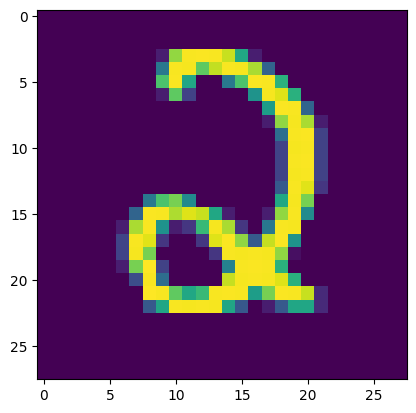

In [311]:

plt.imshow(x_test[31])

In [308]:
y_hat=model.predict(x_test[30:32])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [309]:
y_hat

array([[1.0482604e-08, 2.1065498e-05, 8.7295454e-08, 1.8586416e-02,
        7.0519035e-09, 9.8138398e-01, 1.2425254e-07, 5.6606433e-07,
        7.0708506e-06, 7.0201588e-07],
       [1.6867407e-06, 7.3193668e-08, 9.9999785e-01, 1.3106010e-07,
        2.8645836e-08, 5.8256377e-10, 1.6546882e-07, 8.6588141e-09,
        1.3629401e-08, 4.6502413e-10]], dtype=float32)

In [310]:
import numpy as np
res1,res2=np.argmax(y_hat[0]),np.argmax(y_hat[1])
res1,res2


(5, 2)